# EEG/ERP Data Analysis

Based on Project 2
<br>
<font color = red>This Demo and the attached files from course PSYO/NESC 3505 Neural Data Science, at Dalhousie University. You should not disseminate, distribute or copy. </font>
<br>
<font color = red><strong>NOTE: I did not participate in any part of the experiment.The data is given to me by the professor. I only care about data processing </strong></font>
<br>
<font color = red><strong>NOTE: This is a team-based project and I will try my best to show my personal outcomes. If I need other team members outcomes as supplements, I will provide notes in Markdown or comments in code block.</strong></font>
<br>
<font color = red><strong>NOTE: Please feel free to contact me if you think this Demo has caused you any confusion</strong></font>
<br>
<font color = red>I am NOT post inappropriate or copyrighted content, advertise or promote outside products or organizations.</font>
<br>
<font color = red>If you feel that any part of this demo is inappropriate or controversial, please contact me immediately</font>
<br>
© Copyright 2020.PSYO/NESC 3505 FAll 2020 https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html 
<br>
**For demonstration purposes only**

## Background

> N400 – Artificial Grammar Learning (NAGL) Experiment
<br>
<br>
In the full study, we collected data in two experimental paradigms (N400 and artificial grammar learning), with the aim of finding out whether individual differences in brain activity across the two paradigms were correlated. For this project, we will work only with the N400 data.
<br>
<br>
The N400 is an ERP component associated with processing the meanings of words (semantic information). It was first discovered more than 40 years ago (Kutas & Hillyard, 1980), contrasting sentences that ended with a semantic violation (a word that doesn't make sense given the prior context of the sentence, e.g., I take my coffee with milk and dog.) with meaningful control sentences (e.g., I take my coffee with milk and sugar.). The N400 manifests as a more negative ERP potential, particularly over the top (vertex) of the head, for violation than control sentences, with the largest difference usually around 400-600 ms after the onset of the violation word.
<br>
<br>
The N400 has been studied extensively since then (Kutas & Federmeier, 2011) and the general consensus is that it reflects brain activity associated with integrating incoming information into one's ongoing "context". That is, as we're reading or listening to language, we create a mental representation of the topic (the context), and try to integrate the meaning of each new word into that context. Words that don't make sense are harder (or impossible) to integrate, so our brains engage in more of this "semantic integration" activity, leading to a larger N400.
<br>
<br>
In the present study, we were interested in whether semantic integration changes when there is background noise that makes the sentences harder to hear and understand. So, we presented auditory sentences to participants, with half of the sentences ending with semantic violations. In the first half of the experiment, the sentences were presented with no background noise, but in the second half of the experiment, the sentences were presented with background noise ("multi-talker babble"; the sound of several people talking at once, without any of the background speech being understandable).
<br>
<br>
This experiment combined two tasks that both tap into executive function: the flanker and Simon effects. Participants' task was to press one of two buttons depending on the colour of a circle shown to the left or right of the centre of the screen
<br>


--- PSYO 3505 Fall 2019 Project 2 cell1

This experiment has following hypotheses

>* Here will be an N400 in the quiet condition, with violation sentences eliciting more negative ERPs than control sentences between 400-600 ms
<br>
<br>
* There will also be an N400 in the quiet condition, with violation sentences eliciting more negative ERPs than control sentences between 400-600 ms
<br>
<br>
* The N400 in response to violations will be significantly smaller in the noise than quiet conditions, because more cognitive effort will be directed to filtering out noise, leaving fewer resources to process the semantic anomaly.

--- PSYO 3505 Fall 2019 Project 2 cell2

In [1]:
import numpy as np
import pandas as pd
import os, glob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import mne

## Read files and check it 

Due to only [MNE](https://mne.tools/stable/index.html) package can read .fif files. We first need to get the files path and then using for loop reading the files one by one. 

In [2]:
path = "/Users/sakuramac/eegdata"
subjects = os.listdir(path)

Check the list

In [3]:
print(subjects)

['nagl020-ave.fif', 'nagl030-ave.fif', 'nagl029-ave.fif', 'nagl006-ave.fif', 'nagl016-ave.fif', 'nagl028-ave.fif', 'nagl017-ave.fif', 'nagl007-ave.fif', 'nagl031-ave.fif', 'nagl021-ave.fif', 'nagl005-ave.fif', 'nagl004-ave.fif', 'nagl018-ave.fif', 'nagl008-ave.fif', 'nagl009-ave.fif', 'nagl019-ave.fif', 'nagl026-ave.fif', 'nagl010-ave.fif', 'nagl002-ave.fif', 'nagl003-ave.fif']


In [4]:
# following codes based on team members work and modify 
evoked= {}

for i in range (len(subjects)):
    data = mne.read_evokeds(path + '/' +subjects[i])
    evoked[subjects[i]] = data

Reading /Users/sakuramac/eegdata/nagl020-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (Quiet/Control/Correct)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (Quiet/Violation/Correct)
        0 CTF compensation matrices available
        nave = 33 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (Noise/Control/Correct)
        0 CTF compensation matrices available
        nave = 34 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.22 ...  

We use a dictionary to collect participants' data, the key is a participant number (for conveniences here we use files name to represent participants) and the value is raw data.

In [5]:
evoked['nagl020-ave.fif']

[<Evoked | 'Quiet/Control/Correct' (average, N=39), [-0.19922, 1] sec, 64 ch, ~400 kB>,
 <Evoked | 'Quiet/Violation/Correct' (average, N=33), [-0.19922, 1] sec, 64 ch, ~400 kB>,
 <Evoked | 'Noise/Control/Correct' (average, N=34), [-0.19922, 1] sec, 64 ch, ~400 kB>,
 <Evoked | 'Noise/Violation/Correct' (average, N=25), [-0.19922, 1] sec, 64 ch, ~400 kB>]

For this analysis we do not care about individual results, we can using the 'subjects' list index to get the same results. This makes it easier for us to process the data later because we don't need participant name as the key-value 

In [6]:
evoked.get(subjects[0])

[<Evoked | 'Quiet/Control/Correct' (average, N=39), [-0.19922, 1] sec, 64 ch, ~400 kB>,
 <Evoked | 'Quiet/Violation/Correct' (average, N=33), [-0.19922, 1] sec, 64 ch, ~400 kB>,
 <Evoked | 'Noise/Control/Correct' (average, N=34), [-0.19922, 1] sec, 64 ch, ~400 kB>,
 <Evoked | 'Noise/Violation/Correct' (average, N=25), [-0.19922, 1] sec, 64 ch, ~400 kB>]

There is one list entry for each experimental condition, for access each specific condition we using a list index

In [7]:
evoked.get(subjects[0])[0]

<Evoked | 'Quiet/Control/Correct' (average, N=39), [-0.19922, 1] sec, 64 ch, ~400 kB>

Above approach cannot access the actual value, we need to use a visualization approach to present the data.

Use list comprehension to create a list of 'condition names', we can use this list for the following plots. 

In [8]:
conditions = [evoked.get(subjects[0])[i].comment for i in range(0,len(evoked.get(subjects[0])))]
print(conditions)

['Quiet/Control/Correct', 'Quiet/Violation/Correct', 'Noise/Control/Correct', 'Noise/Violation/Correct']


## Visualization: ERP Waveforms

To ensure the figure results are correct, we first need to average the EEG data by using the mne.grand_average () method. 

In [9]:
[evoked[subj][0] for subj in evoked.keys()]
gavg = {}
# team members code
for index, value in enumerate(conditions):
    gavg[value] = mne.grand_average([evoked[subj][index] for subj in evoked.keys()])

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


We plot the waveforms for a single electrode, Cz, which is located at the vertex (top) of the head. Because the N400 is typically largest at this location.

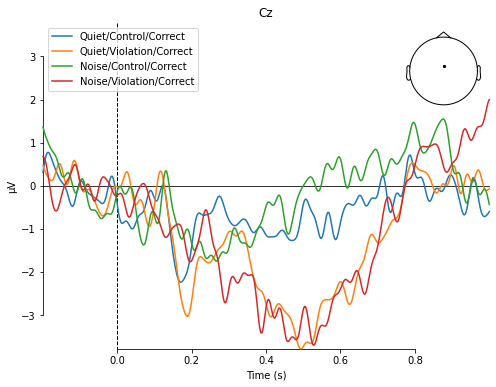

In [10]:
# an example code
Cz_idx = gavg['Quiet/Control/Correct'].ch_names.index('Cz')

mne.viz.plot_compare_evokeds(gavg, picks=Cz_idx)
plt.show()

The topographic map is another way to visualize EEG data. Unlike waveforms, Topo maps show how the voltage is distributed across the scalp. 

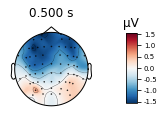

In [11]:
# an example code
gavg['Quiet/Control/Correct'].plot_topomap(.500, average=.200)
plt.show()

> Both types of visualization are useful: waveform plots can help you see when the effects are largest (and especially, when differences occur) over time, but you have to know which electrode(s) to look at. Topo maps, in contrast, allow you to figure out where on the scalp the effects are biggest, but you have to specify time. Or, you can plot a series of topo maps over a range of times.

--- PSYO 3505 Fall 2019 Project 2 cell 37

## Visualizing Difference Waves

We should create a dictionary called gavg_diff that contains the difference waves for each contrast. This dictionary can help us visualize different waves in the next. Again, here using list comprehension to create the dictionary. 

In [12]:
contrasts = {'Quiet_V-C' : ['Quiet/Violation/Correct', 'Quiet/Control/Correct'],
             'Noise_V-C' : ['Noise/Violation/Correct', 'Noise/Control/Correct']
            }
gavg_diff = {}
for i in contrasts:
    gavg_diff[i] = mne.combine_evoked([gavg[contrasts[i][0]], -gavg[contrasts[i][1]]], weights='equal')

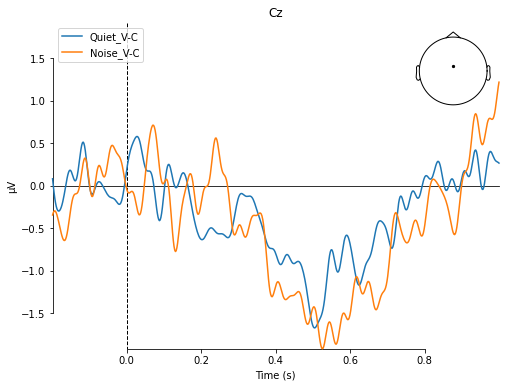

In [13]:
# team members code
mne.viz.plot_compare_evokeds(gavg_diff, picks=Cz_idx)
plt.show()

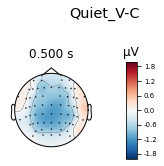

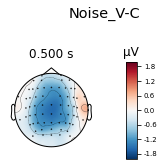

In [14]:
for key in gavg_diff:
    gavg_diff[key].plot_topomap(.500, vmin=-2, vmax=2, average=.200, title=key)
plt.show()

## References

[1] [NESC 3505 Neural Data Science, at Dalhousie University. Textbook](https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html)
<br>
[2] NESC 3505 Neural Data Science, at Dalhousie University. Project 2
<br>
[3] ['Biomedical Image Analysis in Python'.an INTERACTIVE COURSE](https://learn.datacamp.com/courses/biomedical-image-analysis-in-python)

Based on Project 2
<br>
<font color = red>This Demo and the attached files from course PSYO/NESC 3505 Neural Data Science, at Dalhousie University. You should not disseminate, distribute or copy. </font>
<br>
<font color = red><strong>NOTE: I did not participate in any part of the experiment.The data is given to me by the professor. I only care about data processing </strong></font>
<br>
<font color = red><strong>NOTE: This is a team-based project and I will try my best to show my personal outcomes. If I need other team members outcomes as supplements, I will provide notes in Markdown or comments in code block.</strong></font>
<br>
<font color = red><strong>NOTE: Please feel free to contact me if you think this Demo has caused you any confusion</strong></font>
<br>
<font color = red>I am NOT post inappropriate or copyrighted content, advertise or promote outside products or organizations.</font>
<br>
<font color = red>If you feel that any part of this demo is inappropriate or controversial, please contact me immediately</font>
<br>
© Copyright 2020.PSYO/NESC 3505 FAll 2020 https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html 
<br>
**For demonstration purposes only**